<a href="https://colab.research.google.com/github/sebas-prog/Econometria-/blob/main/proyecto_de_enaho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primero se importa las siguientes librerias para la carga, procesamiento y creación de modelos. 

------
Nota: En este documento se creara varios modelos de machine learning en función de la base de datos del enaho.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Se carga la base de datos de enaho con pandas:

In [4]:
base = pd.read_csv("/content/ata.csv")

Se observan los primeros 6 filas de la base datos.

In [5]:
print(base.head(6))

   conglome  vivienda  hogar computadora refri_conge lavadora maq_coser  \
0      5002        11     11          si          si       si        si   
1      5002        23     11          si          si       si         0   
2      5002        49     11          si          si       si         0   
3      5002        73     11           0           0       si         0   
4      5002        97     11           0           0        0         0   
5      5005         9     11          si          si       si       NaN   

  autocamioneta motocicleta triciclo  ... noserv_pub siserv_pub  miembros  \
0             0           0        0  ...          0          1       4.0   
1             0           0        0  ...          0          1       1.0   
2             0           0        0  ...          0          1       4.0   
3             0          si        0  ...          0          1       2.0   
4             0           0        0  ...          0          1       1.0   
5           

Se observan los nombres de las columnas es decir de las posibles variables que podramos tomar para el modelo.

In [6]:
base.columns

Index(['conglome', 'vivienda', 'hogar', 'computadora', 'refri_conge',
       'lavadora', 'maq_coser', 'autocamioneta', 'motocicleta', 'triciclo',
       'mototaxi', 'camion', 'ubigeo', 'cocina', 'asociaciones', 'codperso',
       'remesa', 'pension_jubilacion', 'edad2', 'edad', 'n_miembros', 'hombre',
       'mujer', 'lengua', 'e_sinnivel', 'e_inicial', 'e_primaria',
       'e_secundaria', 'e_superior', 'result', 'n_habitaciones', 'factor07',
       'titulo_propiedad', 'desague_redpublica', 'agua_redpublica',
       'alumbrado_publico', 'celular', 'telefono', 'rural', 'urbano',
       'telefono_celular', 'n_serv', 'noserv_pub1', 'noserv_pub2',
       'noserv_pub3', 'noserv_pub', 'siserv_pub', 'miembros',
       'ingreso_mon_bruto', 'ingreso_mon_neto', 'ingreso_bruto',
       'ingreso_totalneto', 'gasto_mon', 'gasto_bruto', 'pobre'],
      dtype='object')

Ahora se procede a ver los valores faltantes que existen en la base datos. Es decir se observaran aquellas preguntas de la encuesta de hogares que no han sido respodidas.

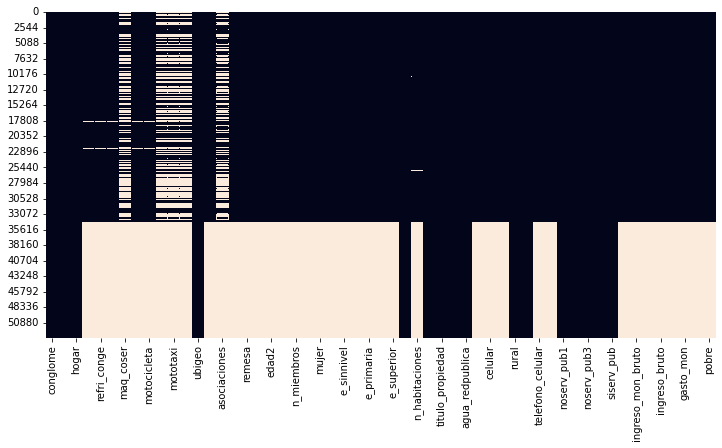

In [7]:
import seaborn as sns
# Identificamos los missing values visualmente
sns.heatmap(base.isnull(), cbar=False)
plt.gcf().set_size_inches(12,6)
plt.show()

Los valors de color negro son los que no estan ausentes y los de color son los valores ausentes.

En el siguiente grafico se observa la proporción de hogares que son pobres y los que no. Como se observa las dos clases presentan una desproporción es decir una clase es mayor en comparación con la otra.

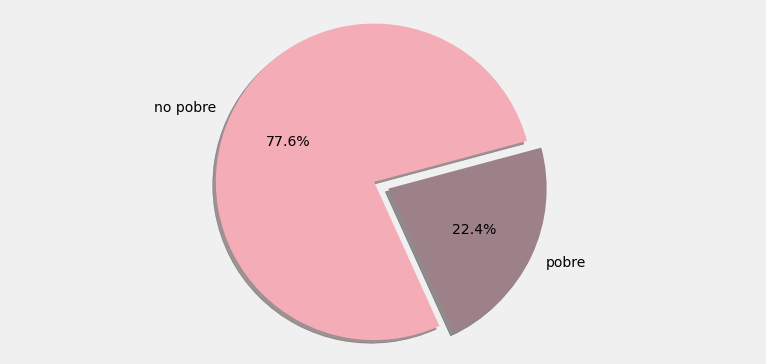

In [8]:
x = base["pobre"].value_counts()
plt.style.use("fivethirtyeight")
myexplode=(0.0,0.1)
mylabel=["no pobre","pobre"]
colors=['#f4acb7','#9d8189']
plt.pie(x,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,explode=myexplode,colors=colors)
plt.axis("equal")
plt.gcf().set_size_inches(12,6)
plt.show()

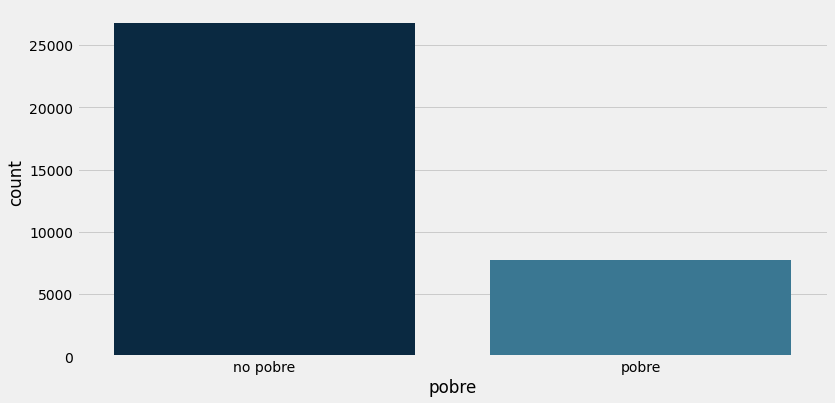

In [9]:
hue_color={0:'#012a4a',1:'#2c7da0'}
sns.countplot(data=base,x='pobre',palette=hue_color)
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.show()

En esta grafica se puede observar el numero de mienbros por familia. Al momento de hacer la valadación cruzada para la elección de hiperparametros del modelo se usara el submuestreo por lo tanto hay familia de solo 20 mienbros por lo que esta variable se tomara como categorica por lo que se toma aparti de 4 a más mienbros.

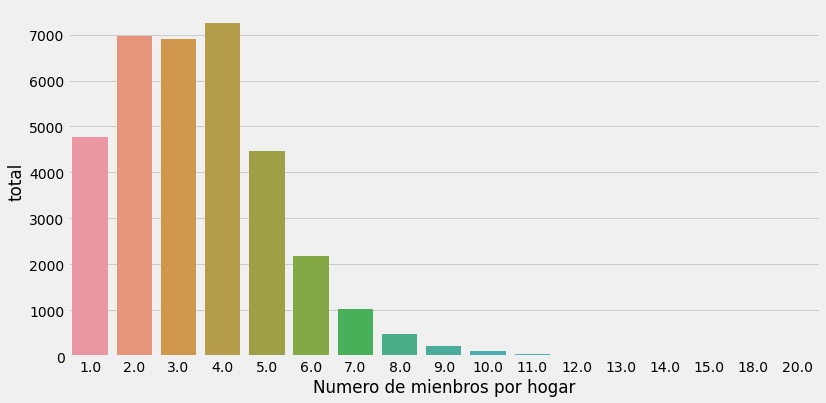

In [10]:
sns.countplot(data=base,x='n_miembros')
plt.gcf().set_size_inches(12,6)
plt.xlabel("Numero de mienbros por hogar")
plt.ylabel("total")
plt.show()

Se selecciona las variables que se van a utilizar para la relazación del modelo:

In [11]:
data_1 = base[["pobre","agua_redpublica","desague_redpublica","alumbrado_publico",
                 "telefono_celular","e_secundaria","e_superior","e_primaria",
                 "lavadora","motocicleta","triciclo","mototaxi","computadora",
                 "cocina","refri_conge","titulo_propiedad","asociaciones",
               "n_miembros","rural","remesa"]]

En el siguiente codigo se establece la condición que se propuso en la linea anterior de codigo.

In [12]:
data_1["mienbros"]= data_1.n_miembros.apply(lambda x: "1" if x >=4  else "0")

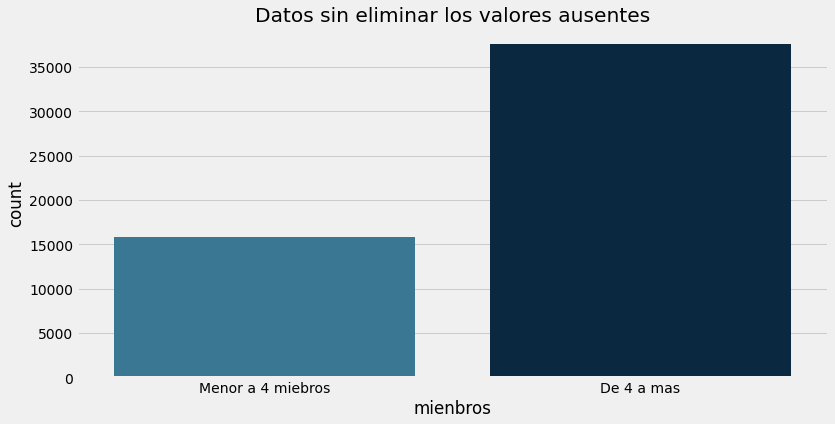

In [13]:
mylabel= ["Menor a 4 miebros","De 4 a mas"]
hue_color={"0":'#012a4a',"1":'#2c7da0'}
sns.countplot(data=data_1,x='mienbros',palette=hue_color)
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.title("Datos sin eliminar los valores ausentes")
plt.show()

Se eliminan las variables que presentan más del 10% de valores ausentes.

In [14]:
data_1= data_1.drop(['triciclo', 'mototaxi', 'asociaciones',"n_miembros"], axis=1)
data_1= data_1.dropna(subset=["pobre"])
data_1= data_1.dropna()

En el sigueinte grafico se aprecia que ya la base esta limpia de valores ausentes.

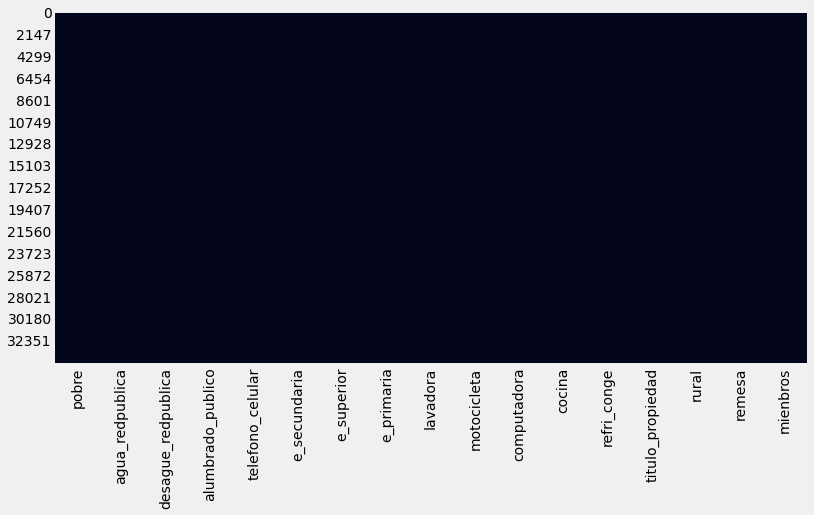

In [15]:
sns.heatmap(data_1.isnull(), cbar=False)
plt.gcf().set_size_inches(12,6)
plt.show()

Se procesa las variables categoricas a númericas.

In [16]:
data_1["lavadora"]= data_1.lavadora.apply(lambda x: "1" if x =="si"  else "0")
data_1["refri_conge"]= data_1.refri_conge.apply(lambda x: "1" if x =="si"  else "0")
data_1["computadora"]= data_1.computadora.apply(lambda x: "1" if x =="si"  else "0")
data_1["motocicleta"]= data_1.motocicleta.apply(lambda x: "1" if x =="si"  else "0")

In [21]:
etiquetas = data_1.columns

In [22]:
data_1[etiquetas] = data_1[etiquetas].astype('int64')

Se separa los datos en entrenamiento y test.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        data_1.drop('pobre', axis = 'columns'),
                                        data_1['pobre'],
                                        train_size   = 0.8,
                                        random_state = 2022,
                                        shuffle      = True
                                    )

Ahora se importan todas las librerias que se usaran para la creación de los modelos de aprendizaje automatico (machine learning).

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Se puedo vizualizar al comienzo del documento que existe un desbalanceo de clases es decir que las etiquetas de la variable dependiente o en nuestro caso **"target"** estan desproporcionadas es decir una clase predomina por encima de otra en este caso nuestros modelos seran sesgados para la clase dominante. Ahora haremos un ejemplo de la regresión logistica cuando ponemos las clases desbalanceadas. 

In [26]:
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=2022,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

In [27]:
model = run_model(X_train, X_test, y_train, y_test)

In [28]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

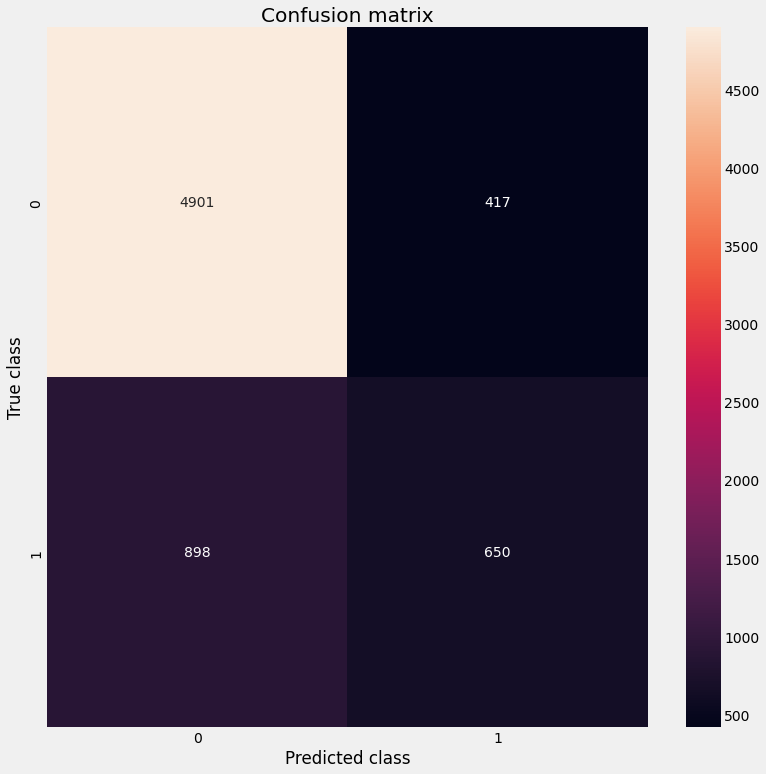

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5318
           1       0.61      0.42      0.50      1548

    accuracy                           0.81      6866
   macro avg       0.73      0.67      0.69      6866
weighted avg       0.79      0.81      0.80      6866



In [29]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Se puede observar que la variable 1 que es la que posee el menor número de elementos en su clase tiene un 61% de la presición pero ocurre que esta medida es un poco engañosa cuando nuestra data es desproporcionada, por lo qye es mejor ver el recall el cual nos da un 42% lo que significa que el modelo solo capta un 42% de las personas que deberian de ser etiquetadas con esta categoria.

Para eso usamos los metodos de balanceo de datos hay muchos metodos pero el que usara en este caso es el smote. Este metodo solo trata de generar datos sinteticos para proporcionar la clase minoritaria.

In [30]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

Pero antes de usar estos metodos la función de regresión logistica posee una configuración que le permite trabajar con base de datos desbaleanceados.

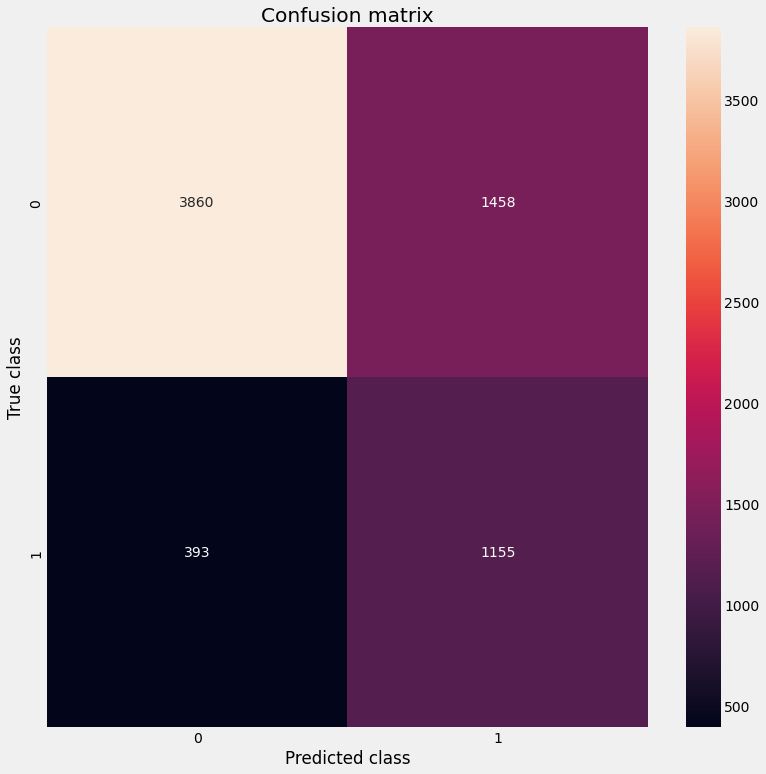

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      5318
           1       0.44      0.75      0.56      1548

    accuracy                           0.73      6866
   macro avg       0.67      0.74      0.68      6866
weighted avg       0.80      0.73      0.75      6866



In [31]:
# Se agrega una penalizacion
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Se observa que ahora el recall es de 75% una gran mejora en comparación con el modelo anterior por lo cual se puede decir que da resultados optimos.

In [32]:
#Importamos los paquetes
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek(random_state = 123)#random_state = 0

Se crea la clase smoteT q¿en cual entrenaremos los datos para usar el metodo smot

In [33]:
X_train_res, y_train_res = smoteT.fit_resample(X_train, y_train)

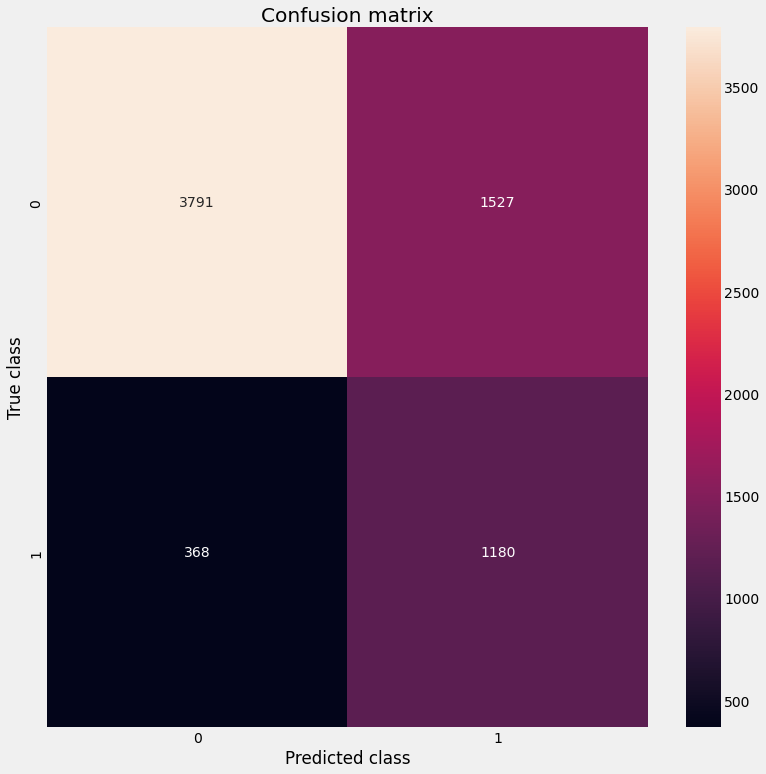

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      5318
           1       0.44      0.76      0.55      1548

    accuracy                           0.72      6866
   macro avg       0.67      0.74      0.68      6866
weighted avg       0.80      0.72      0.74      6866



In [34]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Ahora se entreno el modelo el cual se observo una mejora en el recall del 1%. Al usar este metodo de balanceo se puede observar que el modelo trbaja de una mejor manera.

Ahora se trabaja con el algoritmo de arbol de dicisión.

In [35]:
def run_model_arbol(X_train, X_test, y_train, y_test):
    clf_base = DecisionTreeClassifier(random_state=123)
    clf_base.fit(X_train, y_train)
    return clf_base

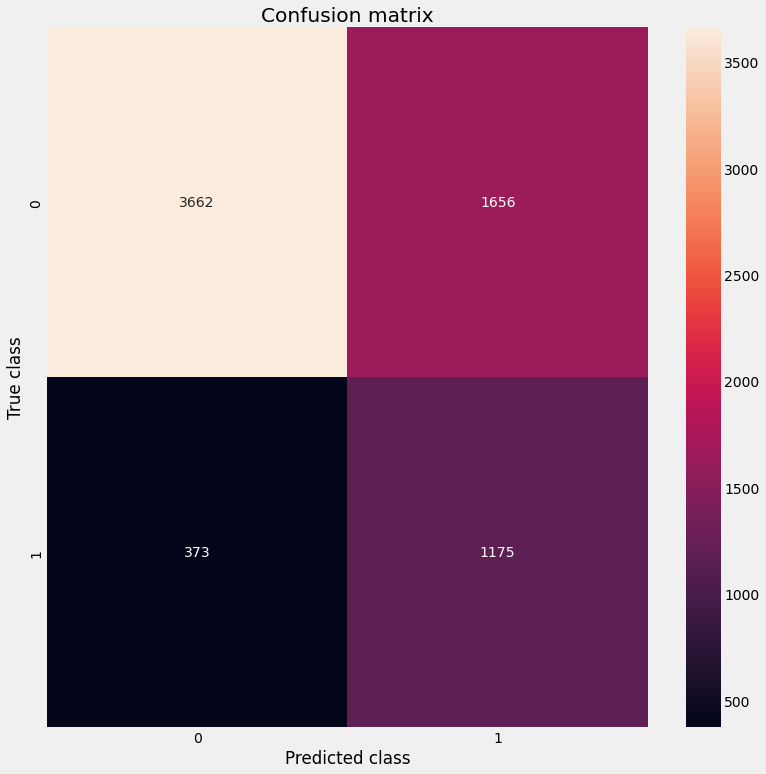

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      5318
           1       0.42      0.76      0.54      1548

    accuracy                           0.70      6866
   macro avg       0.66      0.72      0.66      6866
weighted avg       0.80      0.70      0.73      6866



In [36]:
model = run_model_arbol(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

El recall es del 76%.

Se utiliza el algoritmo de los vecinos más cercanos.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
def run_model_vecinos(X_train, X_test, y_train, y_test):
    clf_base = KNeighborsClassifier()
    clf_base.fit(X_train, y_train)
    return clf_base

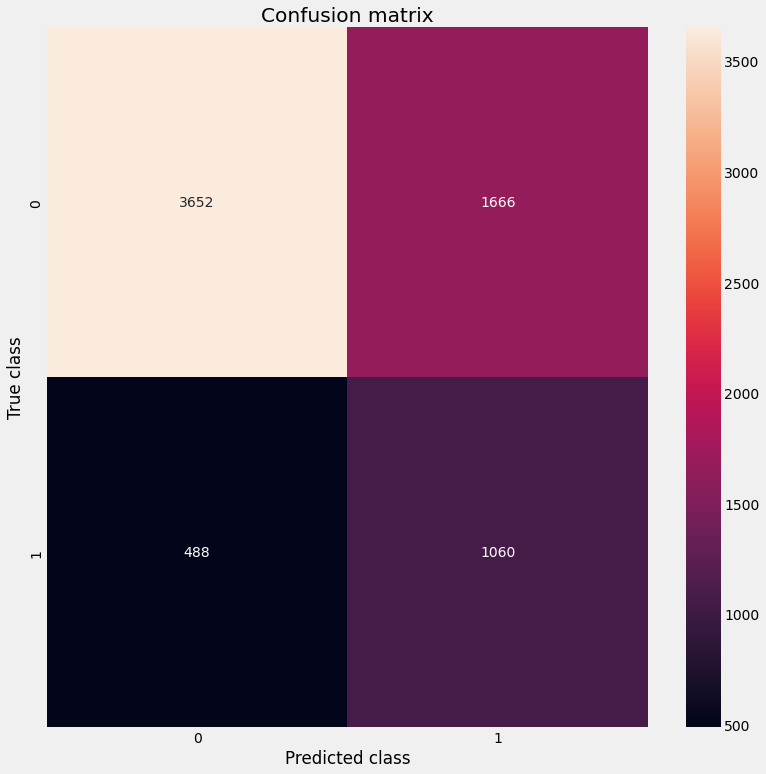

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      5318
           1       0.39      0.68      0.50      1548

    accuracy                           0.69      6866
   macro avg       0.64      0.69      0.63      6866
weighted avg       0.77      0.69      0.71      6866



In [39]:
model = run_model_vecinos(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

EL recall es de un 6%.

Se utiliza el algoritmo de bosques aleatorios.

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
def run_model_bosque(X_train, X_test, y_train, y_test):
    clf_base = RandomForestClassifier(random_state=123)
    clf_base.fit(X_train, y_train)
    return clf_base

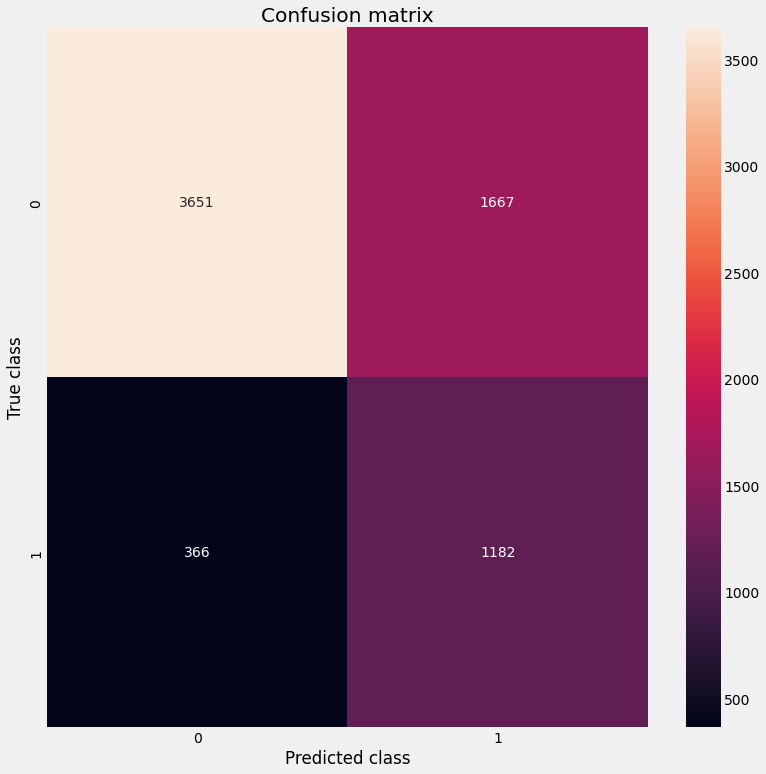

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      5318
           1       0.41      0.76      0.54      1548

    accuracy                           0.70      6866
   macro avg       0.66      0.73      0.66      6866
weighted avg       0.80      0.70      0.73      6866



In [42]:
model = run_model_bosque(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Recall de 76%.

Se utiliza el algoritmo de Xgboost. Este algoritmo es uno de lo más usdos y el que proporciona uno de los mejores resultados en la competiciones de kaagle.

In [43]:
from xgboost import XGBClassifier

In [44]:
def run_model_xg(X_train, X_test, y_train, y_test):
    clf_base = XGBClassifier(random_state=123)
    clf_base.fit(X_train, y_train)
    return clf_base

In [45]:
X_train_res.head()

,agua_redpublica,desague_redpublica,alumbrado_publico,telefono_celular,e_secundaria,e_superior,e_primaria,lavadora,motocicleta,computadora,cocina,refri_conge,titulo_propiedad,rural,remesa,mienbros
0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1
1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1
2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1
3,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0
4,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,1


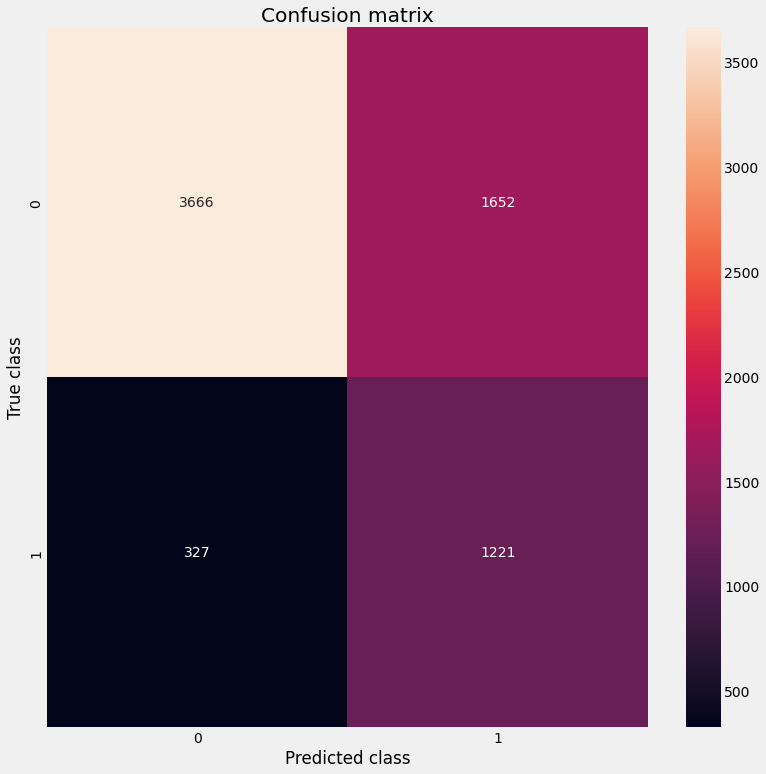

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      5318
           1       0.42      0.79      0.55      1548

    accuracy                           0.71      6866
   macro avg       0.67      0.74      0.67      6866
weighted avg       0.81      0.71      0.73      6866



In [46]:
model = run_model_xg(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Nos arroja un recall del 79%. Superior a todos los metodos.

# Proceso de tuning para los modelos seleccionados.


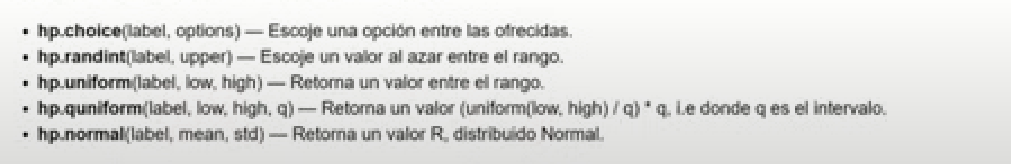

In [47]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [48]:
from sklearn.metrics import accuracy_score

In [56]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0,
        'learning_rate':hp.uniform("learning_rate", 0.05, 0.1 )
    }

In [57]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),
    learning_rate= space["learning_rate"])
    
    evaluation = [(X_train_res, y_train_res), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [58]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.7745412175939411
SCORE:
0.774

In [59]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5148835037680769, 'gamma': 1.3654769938738074, 'learning_rate': 0.07025035101784854, 'max_depth': 11.0, 'min_child_weight': 5.0, 'reg_alpha': 45.0, 'reg_lambda': 0.2330104863132061}


In [61]:
modelo1 = XGBClassifier(colsample_bytree =0.5148835037680769, gamma= 1.3654769938738074, 
                        max_depth= 11, min_child_weight= 5.0, reg_alpha= 45.0, 
                        reg_lambda= 0.2330104863132061,
                        learning_rate=0.07025035101784854)

In [62]:
modelo1.fit(X_train_res, y_train_res)

XGBClassifier(colsample_bytree=0.5148835037680769, gamma=1.3654769938738074,
              learning_rate=0.07025035101784854, max_depth=11,
              min_child_weight=5.0, reg_alpha=45.0,
              reg_lambda=0.2330104863132061)

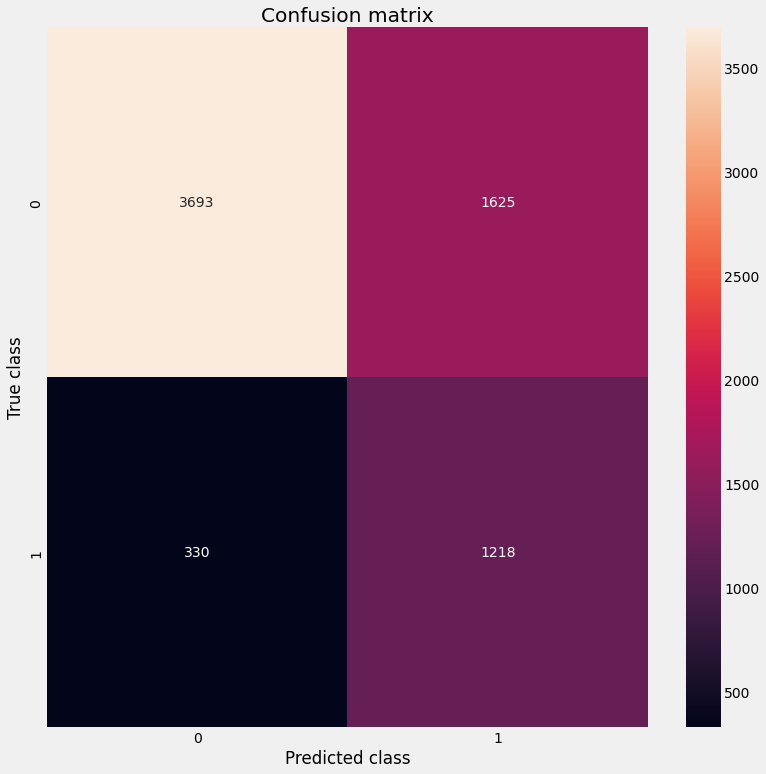

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      5318
           1       0.43      0.79      0.55      1548

    accuracy                           0.72      6866
   macro avg       0.67      0.74      0.67      6866
weighted avg       0.81      0.72      0.74      6866



In [85]:
pred_y = modelo1.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [74]:
space={'n_neighbors': hp.quniform("n_neighbors", 2, 21,1)}

In [75]:
def objective(space):
    clf=KNeighborsClassifier(
                   n_neighbors =int(space['n_neighbors']))
    
    evaluation = [(X_train_res, y_train_res), ( X_test, y_test)]
    
    clf.fit(X_train, y_train)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [76]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.780803961549665
SCORE:
0.7947859015438392
SCORE:
0.7564812117681329
SCORE:
0.7997378386251093
SCORE:
0.7947859015438392
SCORE:
0.7930381590445674
SCORE:
0.7976988057092922
SCORE:
0.7976988057092922
SCORE:
0.7914360617535683
SCORE:
0.803961549665016
SCORE:
0.7914360617535683
SCORE:
0.7914360617535683
SCORE:
0.7984270317506554
SCORE:
0.7914360617535683
SCORE:
0.7968249344596563
SCORE:
0.796533644043111
SCORE:
0.7947859015438392
SCORE:
0.7993009030002913
SCORE:
0.7976988057092922
SCORE:
0.7997378386251093
SCORE:
0.803961549665016
SCORE:
0.8033789688319254
SCORE:
0.8033789688319254
SCORE:
0.803961549665016
SCORE:
0.803961549665016
SCORE:
0.803961549665016
SCORE:
0.8007573550830178
SCORE:
0.8033789688319254
SCORE:
0.8022138071657442
SCORE:
0.796533644043111
SCORE:
0.7978444509175648
SCORE:
0.796533644043111
SCORE:
0.7710457325953977
SCORE:
0.8022138071657442
SCORE:
0.7835712205068454
SCORE:
0.7997378386251093
SCORE:
0.8007573550830178
SCORE:
0.7993009030002913
SCORE:
0.796824934459

In [77]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'n_neighbors': 19.0}


In [79]:
modelo2= KNeighborsClassifier(n_neighbors=19)

In [80]:
modelo2.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

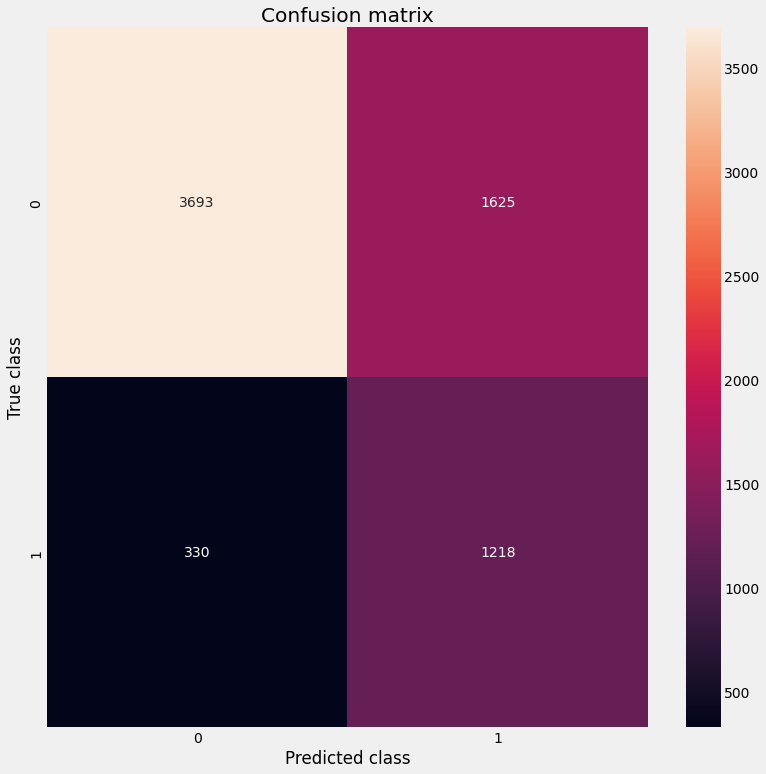

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      5318
           1       0.43      0.79      0.55      1548

    accuracy                           0.72      6866
   macro avg       0.67      0.74      0.67      6866
weighted avg       0.81      0.72      0.74      6866



In [81]:
pred_y = modelo1.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [82]:
from sklearn.metrics import roc_curve

In [83]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

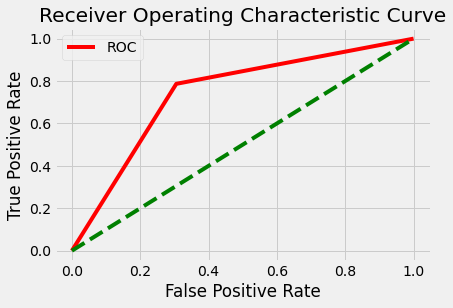

In [86]:
fper, tper, thresholds = roc_curve(y_test, pred_y)
plot_roc_curve(fper, tper)

In [87]:
from sklearn.metrics import roc_auc_score

In [89]:
auc = roc_auc_score(y_test, pred_y)
print(auc)

0.7406278515849345


In [95]:
from sklearn.ensemble import StackingClassifier

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier()))
	# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [96]:
model.fit(X_train_res, y_train_res)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('xgb', XGBClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

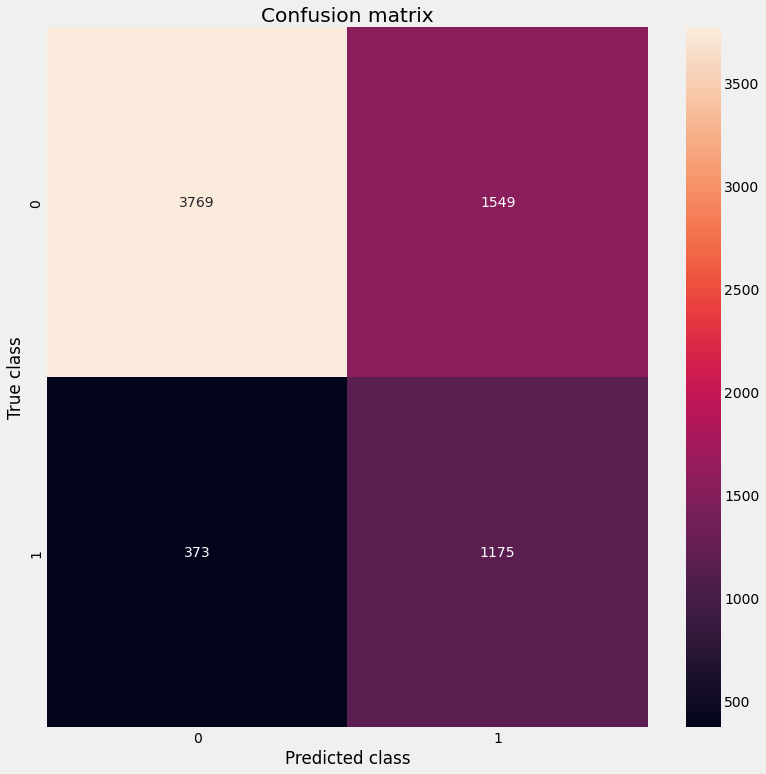

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      5318
           1       0.43      0.76      0.55      1548

    accuracy                           0.72      6866
   macro avg       0.67      0.73      0.67      6866
weighted avg       0.80      0.72      0.74      6866



In [97]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

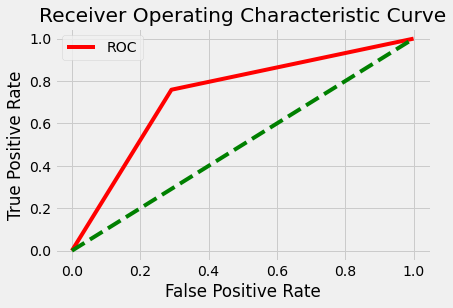

In [98]:
fper, tper, thresholds = roc_curve(y_test, pred_y)
plot_roc_curve(fper, tper)

In [99]:
auc = roc_auc_score(y_test, pred_y)
print(auc)

0.7338845061334283


# Pycaret

In [ ]:
pip install pycaret[full]

In [ ]:
# X_train_res, X_test, y_train_res
data = X_train_res

In [ ]:
data["pobre"]= y_train_res

In [ ]:
data.head()

,agua_redpublica,desague_redpublica,alumbrado_publico,telefono_celular,e_secundaria,e_superior,e_primaria,lavadora,motocicleta,computadora,cocina,refri_conge,titulo_propiedad,rural,remesa,mienbros,pobre
0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1
2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0
3,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0
4,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0


In [ ]:
from pycaret.classification import *
model1 = setup(data = data, target = 'pobre',session_id=123)

,Description,Value
0,session_id,123
1,Target,pobre
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(42656, 17)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7558,0.8325,0.8215,0.7237,0.7695,0.5121,0.5168,1.570
et,Extra Trees Classifier,0.7549,0.8306,0.8130,0.7260,0.7670,0.5102,0.5140,1.650
dt,Decision Tree Classifier,0.7532,0.8265,0.8123,0.7241,0.7656,0.5069,0.5107,0.064
xgboost,Extreme Gradient Boosting,0.7530,0.8342,0.8162,0.7222,0.7663,0.5064,0.5107,12.353
catboost,CatBoost Classifier,0.7528,0.8349,0.8182,0.7213,0.7666,0.5062,0.5108,11.119
lightgbm,Light Gradient Boosting Machine,0.7519,0.8335,0.8126,0.7223,0.7647,0.5043,0.5084,0.382
gbc,Gradient Boosting Classifier,0.7464,0.8287,0.7822,0.7273,0.7537,0.4930,0.4945,1.284
lr,Logistic Regression,0.7456,0.8248,0.7729,0.7303,0.7509,0.4914,0.4923,1.005
ada,Ada Boost Classifier,0.7444,0.8245,0.7594,0.7345,0.7467,0.4888,0.4892,0.578
ridge,Ridge Classifier,0.7442,0.0000,0.7847,0.7234,0.7527,0.4887,0.4906,0.032


In [ ]:
modelo = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7609,0.8265,0.8231,0.7295,0.7735,0.5222,0.5265
1,0.7492,0.8280,0.8109,0.7192,0.7623,0.4988,0.5028
2,0.7572,0.8381,0.8292,0.7224,0.7721,0.5149,0.5206
3,0.7592,0.8360,0.8413,0.7202,0.7761,0.5190,0.5264
4,0.7528,0.8274,0.8219,0.7199,0.7675,0.5062,0.5113
5,0.7525,0.8329,0.8151,0.7221,0.7658,0.5055,0.5096
6,0.7622,0.8411,0.8178,0.7337,0.7735,0.5248,0.5283
7,0.7435,0.8193,0.8070,0.7136,0.7574,0.4874,0.4916
8,0.7669,0.8394,0.8367,0.7320,0.7809,0.5343,0.5397
9,0.7538,0.8364,0.8116,0.7250,0.7658,0.5080,0.5116


In [ ]:
tuned_lightgbm = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7344,0.8165,0.7698,0.7161,0.7419,0.4691,0.4704
1,0.7344,0.8162,0.7562,0.7216,0.7385,0.4690,0.4696
2,0.7371,0.8209,0.7664,0.7211,0.7430,0.4744,0.4754
3,0.7388,0.8245,0.7731,0.7206,0.7459,0.4778,0.4791
4,0.7331,0.8124,0.7719,0.7137,0.7417,0.4665,0.4680
5,0.7495,0.8280,0.7699,0.7371,0.7531,0.4991,0.4996
6,0.7539,0.8303,0.7740,0.7414,0.7573,0.5078,0.5083
7,0.7321,0.8116,0.7598,0.7172,0.7379,0.4644,0.4652
8,0.7371,0.8218,0.7726,0.7188,0.7447,0.4745,0.4758
9,0.7457,0.8274,0.7758,0.7291,0.7517,0.4917,0.4927


In [ ]:
tuned_lightgbm

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

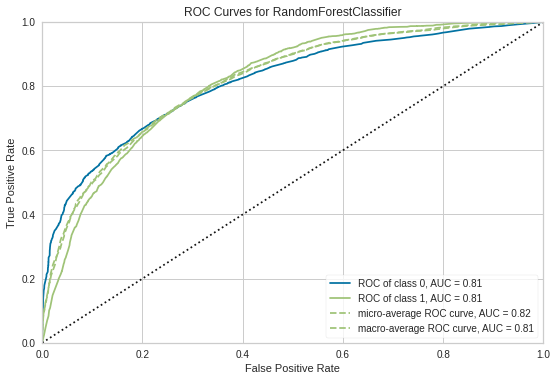

In [ ]:
plot_model(tuned_lightgbm, plot = 'auc')

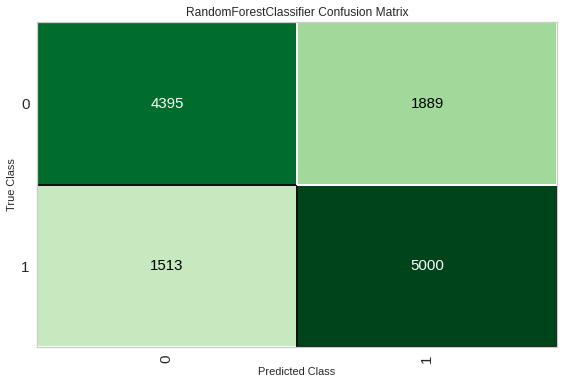

In [ ]:
plot_model(tuned_lightgbm , plot = 'confusion_matrix')

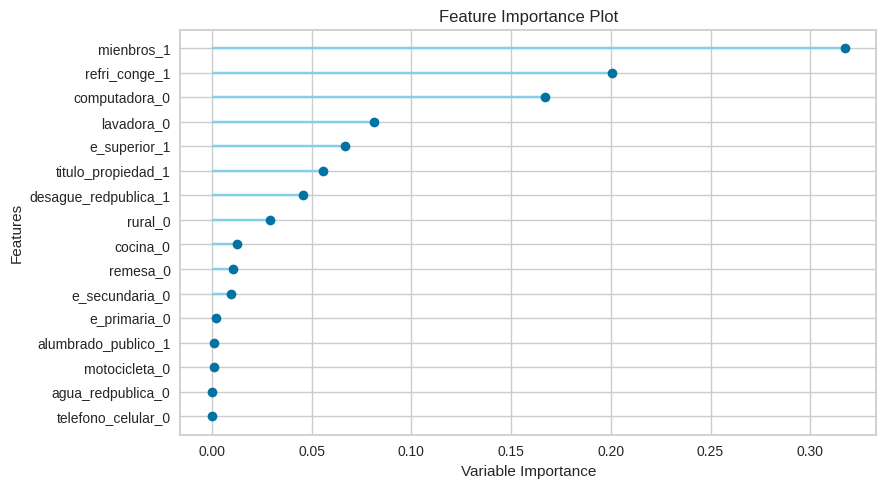

In [ ]:
plot_model(tuned_lightgbm, plot = 'feature_all', use_train_data = True)

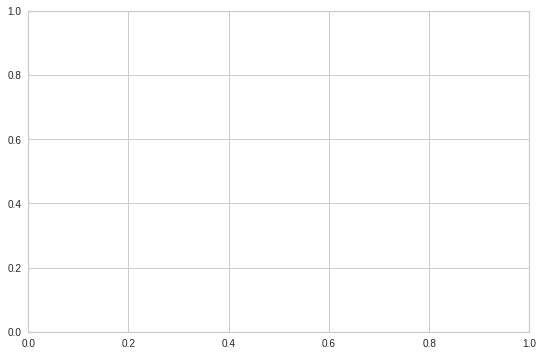

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(tuned_lightgbm)